# Netflix Content Analysis: Data Exploration, Genres, Countries, Directors, and Trends

This notebook analyzes Netflix content data, exploring key aspects such as genre distribution, production by country, top directors and actors, and genre trends over time. The goal is to uncover patterns and insights within the dataset.


-------------

### 1. Data Loading and Cleaning
In this section, we load the raw Netflix dataset CSV file and perform data cleaning.
The cleaning process includes removing duplicate rows, dropping rows and columns with all missing values, converting the release date to a datetime format, extracting the release year, and filling missing values in key columns with appropriate defaults.
The cleaned data is then saved to a new CSV file for further analysis.



In [20]:
# import pandas library for data handling
import pandas as pd

# add the 'src' folder to python's module search path
import sys
sys.path.append('../src')

# import the load_and_clean_data function from preprocessing.py
from preprocessing import *


In [18]:
# define the path to the raw input csv file
input_path = '../data/netflix_raw.csv'

# define the path where the cleaned csv file will be saved
output_path = '../data/netflix_clean.csv'

# load and clean the data using the load_and_clean_data function
df = load_and_clean_data(input_path, output_path)

# display the first few rows of the cleaned data for a quick check
df.head()


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


-------------

### 2. genre analysis
use the analyze_split_genres() function on the genre column

get a table showing genre counts and percentages


In [21]:
# analyze genre distribution and percentage using analyze_split_genres
genre_stats = analyze_split_genres(df, 'Type')

# display the genre analysis results
genre_stats


,Count,Percent
International Movies,2437,14.45
Dramas,2106,12.49
Comedies,1471,8.72
International TV Shows,1176,6.97
Documentaries,786,4.66
Action & Adventure,721,4.27
TV Dramas,680,4.03
Independent Movies,673,3.99
Children & Family Movies,532,3.15
Romantic Movies,531,3.15


-------------

### 3. Content Production Analysis by Country
In this section, we analyze how content production is distributed across different countries.
We use the analyze_production_by_country() function to calculate two things:

Total Productions: the number of records produced by each country

Top 3 Genres: the three most common genres produced in each country

This helps us understand which countries are the most active in content creation and what kind of genres they focus on.


-------------

In [22]:
# analyze production by country using the 'Country' and 'Type' columns
country_production = analyze_production_by_country(df, 'Country', 'Type')

# show the resulting dataframe with total productions and top 3 genres per country
country_production

,Total_Productions,Top_3_Genres
United States,2515,"[Dramas, Comedies, Documentaries]"
India,922,"[International Movies, Dramas, Comedies]"
United Kingdom,381,"[British TV Shows, International TV Shows, Doc..."
Japan,222,"[International TV Shows, Anime Series, Anime F..."
South Korea,179,"[International TV Shows, Korean TV Shows, Roma..."
...,...,...
"India, United Kingdom, China, Canada, Japan, South Korea, United States",1,"[Children & Family Movies, Comedies]"
"Indonesia, Netherlands",1,"[Dramas, International Movies]"
"Indonesia, South Korea, Singapore",1,"[Dramas, International Movies]"
"Indonesia, United Kingdom",1,"[Dramas, International Movies]"


-------------

### 4. Directors and Actors Analysis


In this section, we identify the most active directors and actors in the dataset.
Using the analyze_directors_actors() function, we extract:

Top Directors: ranked by the number of productions they've directed

Top Actors: ranked by the number of productions they've appeared in

Genres per Director: to see which genres each director works in the most

This gives insight into individual contributions and creative trends among top figures in the industry.

python
Copy
Edit


In [33]:
# analyze directors, actors, and genres they work with
directors_df, actors_df, director_genres = analyze_directors_actors(df, 'Director', 'Cast', 'Type')
import pandas as pd

# top 5 directors
top_5_directors = directors_df.head(5).reset_index(drop=True)

# prepare director genres summary
director_genres_summary = []
for director in top_5_directors['Director']:
    genres_list = director_genres.get(director, [])
    # sort genres by count and pick top 3
    top_genres = sorted(genres_list, key=lambda x: x[1], reverse=True)[:3]
    # join genres as "Genre (Count)"
    genres_str = ', '.join([f"{genre} ({count})" for genre, count in top_genres])
    director_genres_summary.append(genres_str)

# add genres summary column
top_5_directors['Top Genres'] = director_genres_summary
top_5_directors.rename(columns={'Total_Productions': 'Productions'}, inplace=True)


# top 5 actors
top_5_actors = actors_df.head(5).reset_index(drop=True)

# prepare actor genres summary
actor_genres_summary = []
for actor in top_5_actors['Actor']:
    actor_rows = df[df['Cast'].str.contains(actor, na=False)]
    genres_series = actor_rows['Type'].dropna().apply(lambda x: [g.strip() for g in x.split(',')])
    all_genres = [genre for sublist in genres_series for genre in sublist]
    genre_counts = Counter(all_genres)
    top_genres = genre_counts.most_common(3)
    genres_str = ', '.join([f"{genre} ({count})" for genre, count in top_genres])
    actor_genres_summary.append(genres_str)

top_5_actors['Top Genres'] = actor_genres_summary
top_5_actors.rename(columns={'Total_Productions': 'Productions'}, inplace=True)


# show tables
print("Top 5 Directors with Their Top Genres:")
display(top_5_directors[['Director', 'Productions', 'Top Genres']])

print("\nTop 5 Actors with Their Top Genres:")
display(top_5_actors[['Actor', 'Productions', 'Top Genres']])



Top 5 Directors with Their Top Genres:


,Director,Productions,Top Genres
0,Jan Suter,21,Stand-Up Comedy (21)
1,Raúl Campos,19,Stand-Up Comedy (20)
2,Marcus Raboy,16,"Stand-Up Comedy (15), Stand-Up Comedy & Talk S..."
3,Jay Karas,15,"Stand-Up Comedy (14), Children & Family Movies..."
4,Cathy Garcia-Molina,13,"International Movies (13), Dramas (9), Romanti..."



Top 5 Actors with Their Top Genres:


,Actor,Productions,Top Genres
0,Anupam Kher,41,"International Movies (37), Dramas (28), Comedi..."
1,Shah Rukh Khan,35,"International Movies (32), Dramas (28), Comedi..."
2,Naseeruddin Shah,30,"Dramas (26), International Movies (25), Comedi..."
3,Om Puri,30,"International Movies (27), Dramas (19), Comedi..."
4,Akshay Kumar,29,"International Movies (27), Dramas (15), Comedi..."


--------

### 5. genre trend analysis over time
this section examines the yearly trends of genres using the function `genre_trend_over_time()`.
it helps to see which genres are growing or declining over the years, providing insight into changing audience preferences and production focus.


In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# get yearly genre trends
genre_trends = genre_trend_over_time(df, 'Release_Date', 'Type')

# show sample of the trend data
print("sample genre trend data by year:")
display(genre_trends.head())

# select top 5 genres by total production count
top_genres = genre_trends.sum().sort_values(ascending=False).head(5).index



sample genre trend data by year:


Type,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
Year,,,,,,,,,,,,,,,,,,,,,
2008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2011,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2012,0,0,0,0,1,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


--------

### genre distribution analysis

visualize the top 10 most common genres using a bar chart


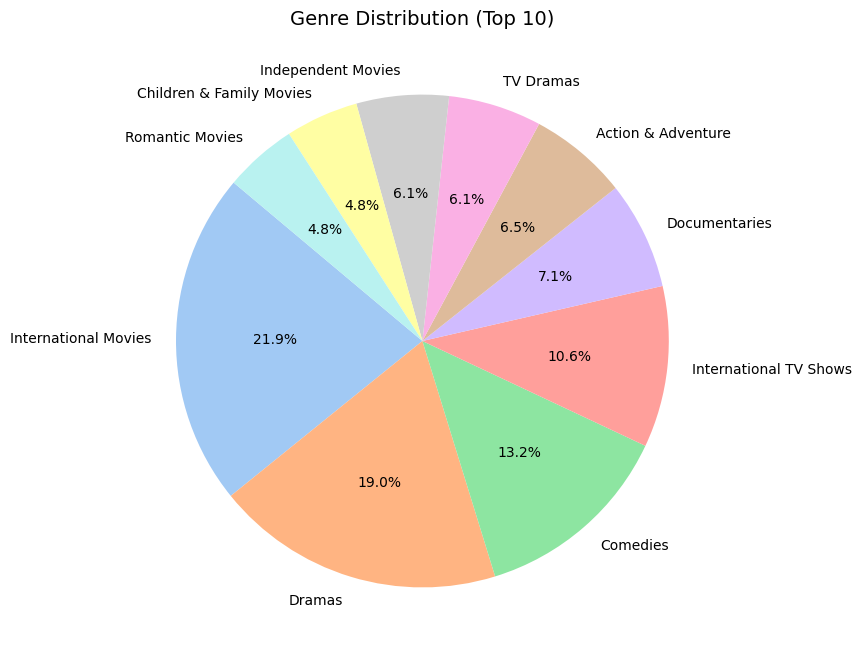

In [38]:
top_genres_pie = top_genres.copy()
plt.figure(figsize=(8,8))
plt.pie(top_genres_pie['Count'], labels=top_genres_pie.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Genre Distribution (Top 10)', fontsize=14)
plt.show()


### country-wise production analysis

visualize top countries based on total number of productions


/var/folders/t7/51pwy_l57jl4zmggb0fmmj4m0000gn/T/ipykernel_8172/1711627831.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries['Total_Productions'], y=top_countries.index, palette='Blues_d')


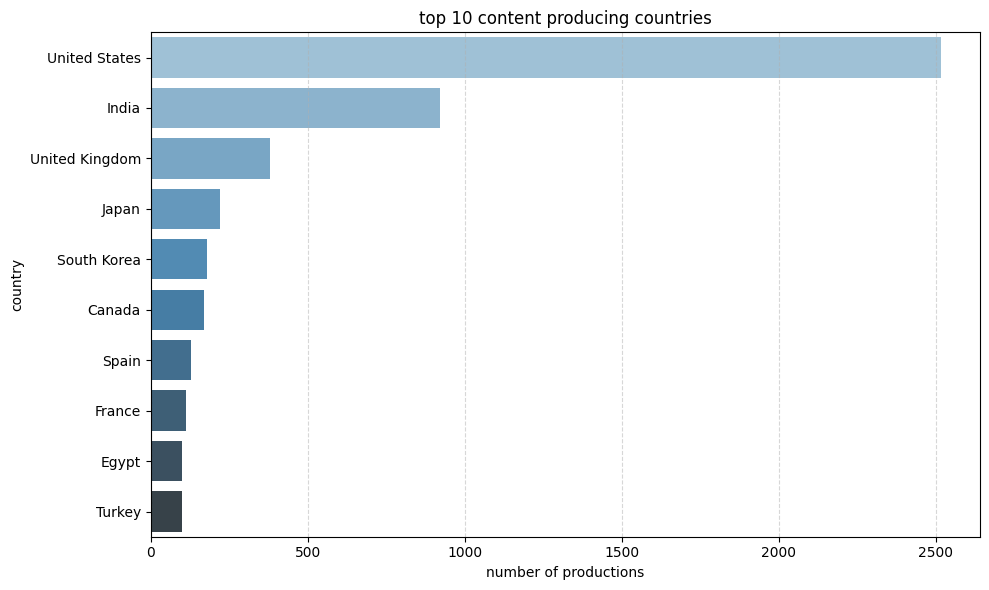

In [39]:
# select top 10 producing countries
top_countries = country_production.head(10)

# plot country production
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries['Total_Productions'], y=top_countries.index, palette='Blues_d')
plt.title('top 10 content producing countries')
plt.xlabel('number of productions')
plt.ylabel('country')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### top directors and their genres

display top 5 directors with number of productions and most common genres they work in

In [40]:
# display top 5 directors
top_5_directors.style.set_caption("top 5 directors and their most common genres")\
    .background_gradient(cmap='Oranges', subset=['Productions'])\
    .set_properties(**{'text-align': 'left'})\
    .set_table_styles([{
        'selector': 'th',
        'props': [('font-size', '12pt'), ('background-color', '#f8f8f8')]
    }])


,Director,Productions,Top Genres
0,Jan Suter,21,Stand-Up Comedy (21)
1,Raúl Campos,19,Stand-Up Comedy (20)
2,Marcus Raboy,16,"Stand-Up Comedy (15), Stand-Up Comedy & Talk Shows (1), TV Comedies (1)"
3,Jay Karas,15,"Stand-Up Comedy (14), Children & Family Movies (1), Comedies (1)"
4,Cathy Garcia-Molina,13,"International Movies (13), Dramas (9), Romantic Movies (8)"


## top actors and their genres


display top 5 actors with number of productions and most common genres they appeared in

In [41]:
# display top 5 actors
top_5_actors.style.set_caption("top 5 actors and their most common genres")\
    .background_gradient(cmap='Greens', subset=['Productions'])\
    .set_properties(**{'text-align': 'left'})\
    .set_table_styles([{
        'selector': 'th',
        'props': [('font-size', '12pt'), ('background-color', '#f8f8f8')]
    }])


,Actor,Productions,Top Genres
0,Anupam Kher,41,"International Movies (37), Dramas (28), Comedies (19)"
1,Shah Rukh Khan,35,"International Movies (32), Dramas (28), Comedies (16)"
2,Naseeruddin Shah,30,"Dramas (26), International Movies (25), Comedies (12)"
3,Om Puri,30,"International Movies (27), Dramas (19), Comedies (10)"
4,Akshay Kumar,29,"International Movies (27), Dramas (15), Comedies (14)"


### genre trend analysis over time


plot yearly trends of the top 5 most popular genres to see how they changed over time

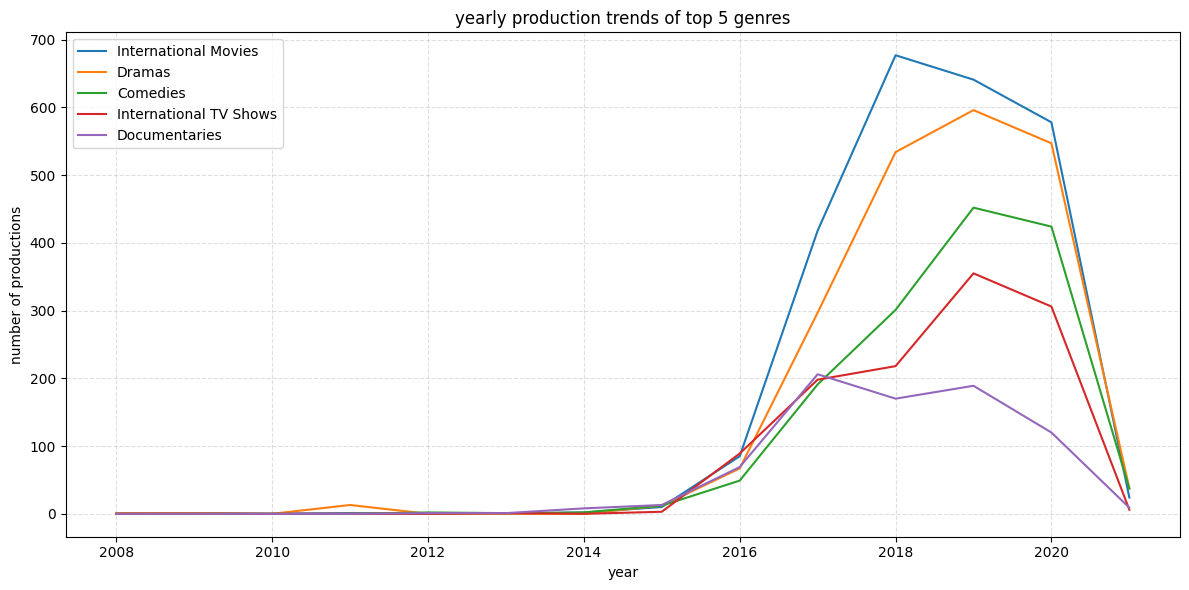

In [42]:
# get top 5 genres over all years
top_genres = genre_trends.sum().sort_values(ascending=False).head(5).index

# plot yearly trends
plt.figure(figsize=(12,6))
for genre in top_genres:
    plt.plot(genre_trends.index, genre_trends[genre], label=genre)

plt.title('yearly production trends of top 5 genres')
plt.xlabel('year')
plt.ylabel('number of productions')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
